**Change directory and Set path**

In [13]:
#Do this to work on main dir
import os
os.chdir("/home/bill/GitHub/wps-research/data/bill")

In [15]:
import yaml

with open("config.yaml", "r") as f:
    cfg = yaml.safe_load(f)

cfg

{'paths': {'main': '/home/bill/GitHub/wps-research/data/bill'},
 'names': {'fire': 'C11659'}}

In [17]:
from pathlib import Path

MAIN = Path(cfg['paths']['main'])
FIRE = Path(cfg['names']['fire'])

paths = {
    "l2a_dir": MAIN / FIRE / 'L2A'
}

**Load libraries**

Reload

In [18]:
import importlib

In [19]:
import SAFE
import raster

importlib.reload(SAFE)
importlib.reload(raster)

<module 'raster' from '/home/bill/GitHub/wps-research/data/bill/raster.py'>

In [ ]:
#Main libs
from SAFE import ENVI_stack_L2
from raster import Raster

In [ ]:
#Visual libs
from plot_tools import plot
import matplotlib.pyplot as plt

In [ ]:
#Built-in libs
import numpy as np

**Load Data**

DAY 1

In [3]:
#day 1

cloud_prob_file_1 = 'L2_C11659/S2C_MSIL2A_20250828T192931_N0511_R142_T09UYU_20250828T225113.SAFE/GRANULE/L2A_T09UYU_A005117_20250828T193515/QI_DATA/MSK_CLDPRB_20m.jp2'

scl_file_1 = 'L2_C11659/S2C_MSIL2A_20250828T192931_N0511_R142_T09UYU_20250828T225113.SAFE/GRANULE/L2A_T09UYU_A005117_20250828T193515/IMG_DATA/R20m/T09UYU_20250828T192931_SCL_20m.jp2'

band12_file_1 = 'L2_C11659/S2C_MSIL2A_20250828T192931_N0511_R142_T09UYU_20250828T225113.SAFE/GRANULE/L2A_T09UYU_A005117_20250828T193515/IMG_DATA/R20m/T09UYU_20250828T192931_B12_20m.jp2'

In [4]:
cloud_prob_1 = Raster(cloud_prob_file_1)
cloud_prob_dat_1 = cloud_prob_1.read_bands().squeeze()

RuntimeError: L2_C11659/S2C_MSIL2A_20250828T192931_N0511_R142_T09UYU_20250828T225113.SAFE/GRANULE/L2A_T09UYU_A005117_20250828T193515/QI_DATA/MSK_CLDPRB_20m.jp2: No such file or directory

In [ ]:
scl_1 = Raster(scl_file_1)
scl_1_dat = scl_1.read_bands().squeeze()

In [ ]:
band12_1 = Raster(band12_file_1)
band12_dat_1 = band12_1.read_bands().squeeze()

DAY 2

In [ ]:
#day 2

cloud_prob_file_2 = 'L2_C11659/S2B_MSIL2A_20250830T191909_N0511_R099_T09UYU_20250830T225737.SAFE/GRANULE/L2A_T09UYU_A044312_20250830T192054/QI_DATA/MSK_CLDPRB_20m.jp2'

scl_file_2 = 'L2_C11659/S2B_MSIL2A_20250830T191909_N0511_R099_T09UYU_20250830T225737.SAFE/GRANULE/L2A_T09UYU_A044312_20250830T192054/IMG_DATA/R20m/T09UYU_20250830T191909_SCL_20m.jp2'

band12_file_2 = 'L2_C11659/S2B_MSIL2A_20250830T191909_N0511_R099_T09UYU_20250830T225737.SAFE/GRANULE/L2A_T09UYU_A044312_20250830T192054/IMG_DATA/R20m/T09UYU_20250830T191909_B12_20m.jp2'

In [ ]:
cloud_prob_2 = Raster(cloud_prob_file_2)
cloud_prob_dat_2 = cloud_prob_2.read_bands('all').squeeze()

In [ ]:
scl_2 = Raster(scl_file_2)
scl_2_dat = scl_2.read_bands().squeeze()

In [ ]:
band12_2 = Raster(band12_file_2)
band12_dat_2 = band12_2.read_bands('all').squeeze()

**Visualize Cloud probs**

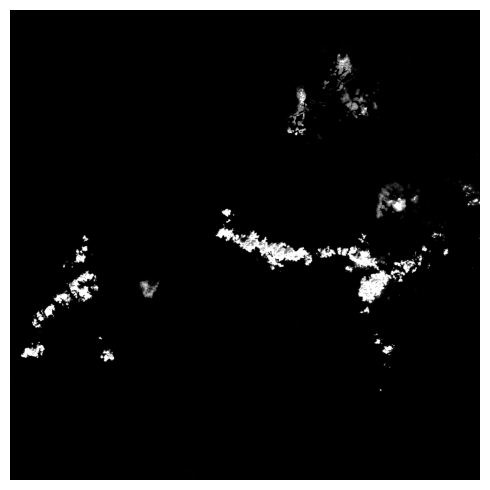

In [ ]:
plot(cloud_prob_dat_1, figsize=(5,5))

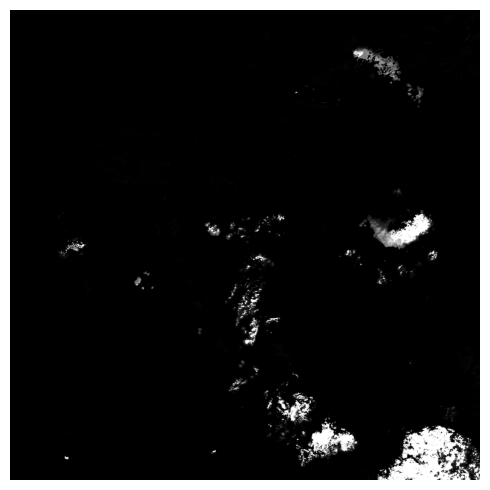

In [ ]:
plot(cloud_prob_dat_2, figsize=(5,5))

**Question**

At the same spot that is not cloudy in both 2 adjacent days, would band data stay the same?

To do so, 

+ Cloud probability for both of the days (done)

+ No data out. (scl value of 0)

In [ ]:
both_cloud = np.logical_or(cloud_prob_dat_1, cloud_prob_dat_2).astype(np.bool_)

In [ ]:
both_no_data = np.logical_and(scl_1_dat, scl_2_dat).astype(np.bool_)

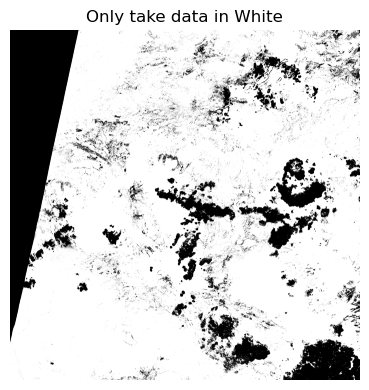

In [ ]:
condition = ~both_cloud & both_no_data

plot(condition, figsize=(4,4), title='Only take data in White')

In [ ]:
condition = ~both_cloud & both_no_data

band12_dat_1_no_cloud = band12_dat_1[condition]

band12_dat_2_no_cloud = band12_dat_2[condition]

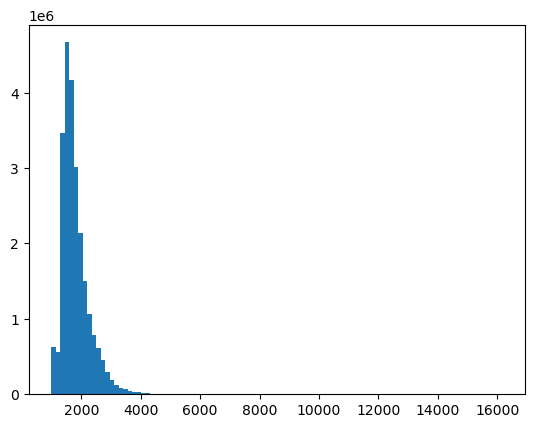

In [ ]:
plt.hist(band12_dat_1_no_cloud, bins = 100)
plt.show()

In [ ]:
band12_dat_1_no_cloud

array([1871., 1634., 1221., ..., 1818., 1784., 1751.], dtype=float32)

In [ ]:
band12_dat_2_no_cloud

array([1987., 1628., 1207., ..., 2140., 2067., 2023.], dtype=float32)

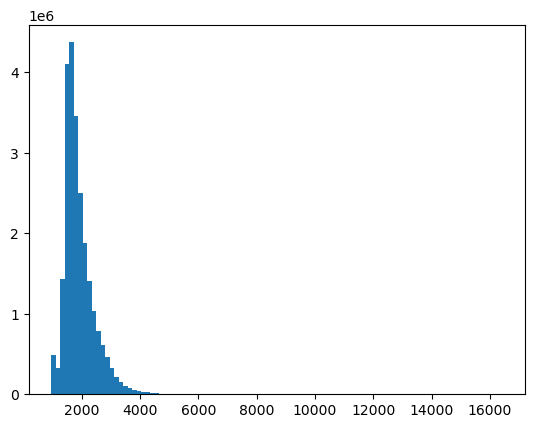

In [ ]:
plt.hist(band12_dat_2_no_cloud, bins = 100)
plt.show()

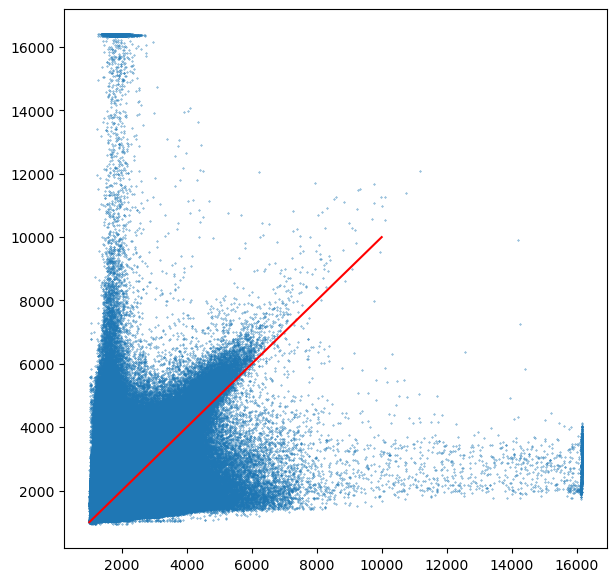

In [ ]:
line = np.linspace(1000, 10000, 10000)

plt.figure(figsize=(7,7))
plt.scatter(band12_dat_1_no_cloud, band12_dat_2_no_cloud, s = 0.1)
plt.plot(line, line, c='red')
plt.show()

2. For each cloud probability bin (e.g 20-25% is 1 bin). Get a scatter plot of.

( band data at t, band data at t_next ). Is it a linear trend?